 Initial step is to import both files.

Afterwords we can perform some basic manipulations and ploting.


In [81]:
import pandas as pd

In [206]:
degs_df = pd.read_excel("degs.xlsx")
pca_df = pd.read_excel("pca_data.xlsx")
go_df = pd.read_excel("up_go.xlsx")

# Working with DEGs


In [83]:
#This is the full data
degs_df 

,DEGs with known function,eg_qval*,eg_FC1,eg_Log2FC2,eu_qval*,eu_FC1,eu_Log2FC2,Condition
0,Zinc metalloprotease,0.01,1.34,0.42,0.05,1.34,0.42,Up
1,Zinc finger bed domain-containing protein days...,0.01,1.25,0.32,0.01,1.20,0.26,Up
2,Plasma membrane ATPase,0.01,1.19,0.25,0.01,1.21,0.28,Up
3,Family 15 glycoside hydrolase,0.01,1.19,0.25,0.01,1.17,0.23,Up
4,TATA-box-binding protein,0.01,1.18,0.24,0.01,1.19,0.25,Up
...,...,...,...,...,...,...,...,...
252,Large subunit ribosomal L38e,0.00,0.00,0.00,0.02,0.95,-0.08,Down
253,Serine threonine- kinase fhkC,0.00,0.00,0.00,0.05,0.95,-0.08,Down
254,Ubiquitin-like-specific protease 2,0.00,0.00,0.00,0.05,0.95,-0.08,Down
255,Kinase,0.00,0.00,0.00,0.05,0.95,-0.08,Down


In [84]:
#E. grandis info
eg_df = degs_df[["DEGs with known function", "eg_qval*", "eg_Log2FC2", "Condition"]]
#E. urophylla info
eu_df = degs_df[["DEGs with known function", "eu_qval*", "eu_Log2FC2", "Condition"]]

### About the LogFC

It's also useful to know that a log2 fold change (B/A) of 1 means B is twice as large as A, while log2fc of 2 means B is 4x as large as A. Conversely, -1 means A is twice as large as B, and -2 means A is 4x as large as B.


### About the q value

Use the qval, not the raw pvalue. The "minimum of 3 replicates" is a good general rule of thumb since you need that many to have a decent shot at measuring variance. The recommend value is at least  replicates, which happen to fit nicely on a single lane of a HiSeq if you have a standard two group comparison setup.

In [85]:
#eg_df
eg_up_df = eg_df[eg_df["eg_Log2FC2"] > 0]
eg_down_df = eg_df[eg_df["eg_Log2FC2"]< 0]

#eg_up_df = eg_df[eg_df["eg_Log2FC2"].astype(float) > 0]
#eg_df["eg_Log2FC2"] = pd.to_numeric(eg_df["eg_Log2FC2"])
#eg_up_df = eg_df[eg_df["eg_Log2FC2"] > 0]



In [86]:
#Up
eg_up_df
 

,DEGs with known function,eg_qval*,eg_Log2FC2,Condition
0,Zinc metalloprotease,0.01,0.42,Up
1,Zinc finger bed domain-containing protein days...,0.01,0.32,Up
2,Plasma membrane ATPase,0.01,0.25,Up
3,Family 15 glycoside hydrolase,0.01,0.25,Up
4,TATA-box-binding protein,0.01,0.24,Up
5,Serine/threonine protein kinase,0.01,0.23,Up
6,AGC NDR kinase,0.01,0.19,Up
7,Histone H3,0.01,0.19,Up
8,Secreted protein,0.01,0.17,Up
9,Family 26 glycoside hydrolase,0.03,0.15,Up


In [87]:
#Down 
eg_down_df 

,DEGs with known function,eg_qval*,eg_Log2FC2,Condition
116,Thiamine thiazole synthase,0.01,-1.70,Down
117,D-lactaldehyde dehydrogenase,0.01,-0.98,Down
118,Aminotransferase,0.01,-0.72,Down
119,Proline iminopeptidase,0.01,-0.68,Down
120,Glyceraldehyde-3-phosphate dehydrogenase,0.01,-0.68,Down
...,...,...,...,...
203,Exosome complex component RRP4,0.02,-0.51,Down
204,Succinyl- synthetase alpha subunit,0.05,-0.49,Down
205,3-hydroxyisobutyrate dehydrogenase,0.01,-0.48,Down
206,GDP-L-fucose synthase,0.02,-0.45,Down


### On the paper it says 

487 differentially expressed genes (DEGs) in E.g. x MO analysis and almost twice in E.u. x MO analysis (851 DEGs).

In [88]:
# Eg DEG
print("E. grandis DEGs info")
print("Total DEGs {}".format(eg_df.shape[0]))
print("Total up {}".format(eg_up_df.shape[0]))
print("Total down {}".format(eg_down_df.shape[0]))
print("LogFC2 info = Max value {}, the min {} and avarege {}".format(eg_up_df["eg_Log2FC2"].max(), eg_up_df["eg_Log2FC2"].min(),eg_up_df["eg_Log2FC2"].mean()))

E. grandis DEGs info
Total DEGs 257
Total up 53
Total down 86
LogFC2 info = Max value 0.65, the min 0.09 and avarege 0.190754716981132


In [89]:
#eu_df
eu_up_df = eu_df[eu_df["eu_Log2FC2"] > 0]
eu_down_df = eu_df[eu_df["eu_Log2FC2"]< 0]

In [90]:
# Eu DEG
print("E. urophylla DEGs info")
print("Total DEGs {}".format(eu_df.shape[0]))
print("Total up {}".format(eu_up_df.shape[0]))
print("Total down {}".format(eu_down_df.shape[0]))
print("LogFC2 info = Max value {}, the min {} and avarege {:.4}".format(eu_up_df["eu_Log2FC2"].max(), eu_up_df["eu_Log2FC2"].min(),eu_up_df["eu_Log2FC2"].mean()))

E. urophylla DEGs info
Total DEGs 257
Total up 108
Total down 132
LogFC2 info = Max value 0.76, the min 0.11 and avarege 0.2031


### Vollcano plot of the DEGs

We will use bioinfokit for that! 
But there is no info about the normal genes, so we can't use the tool.


We will have to use seaborn

In [91]:
from bioinfokit import  analys, visuz
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib

In [92]:
#visuz.GeneExpression.volcano(df = eu_df, lfc = "eu_Log2FC2", pv = "eu_qval*", lfc_thr=(-2, 2), pv_thr=(1, 0), show = True)

In [93]:
#Log transform qval data to -log10
eu_df["eu_qval*"] =  -(np.log10(eu_df["eu_qval*"]))


/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
eu_df

,DEGs with known function,eu_qval*,eu_Log2FC2,Condition
0,Zinc metalloprotease,1.301030,0.42,Up
1,Zinc finger bed domain-containing protein days...,2.000000,0.26,Up
2,Plasma membrane ATPase,2.000000,0.28,Up
3,Family 15 glycoside hydrolase,2.000000,0.23,Up
4,TATA-box-binding protein,2.000000,0.25,Up
...,...,...,...,...
252,Large subunit ribosomal L38e,1.698970,-0.08,Down
253,Serine threonine- kinase fhkC,1.301030,-0.08,Down
254,Ubiquitin-like-specific protease 2,1.301030,-0.08,Down
255,Kinase,1.301030,-0.08,Down


In [95]:
#Log transform qval data to -log10
#eg_df["eg_qval*"] = pd.to_numeric(eg_df["eg_qval*"])
eg_df["eg_qval*"] =  -(np.log10(eg_df["eg_qval*"]))

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
eg_df

,DEGs with known function,eg_qval*,eg_Log2FC2,Condition
0,Zinc metalloprotease,2.0,0.42,Up
1,Zinc finger bed domain-containing protein days...,2.0,0.32,Up
2,Plasma membrane ATPase,2.0,0.25,Up
3,Family 15 glycoside hydrolase,2.0,0.25,Up
4,TATA-box-binding protein,2.0,0.24,Up
...,...,...,...,...
252,Large subunit ribosomal L38e,inf,0.00,Down
253,Serine threonine- kinase fhkC,inf,0.00,Down
254,Ubiquitin-like-specific protease 2,inf,0.00,Down
255,Kinase,inf,0.00,Down


## E urophylla


/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



'\nSimilar \n\n\ng = sns.catplot(x = "eu_Log2FC2", y= "DEGs with known function", data = eu_df, cmap = "seismic", dodge = True)\ng.set(ylabel=None)\ng.set(yticklabels=[])\n\n\n'

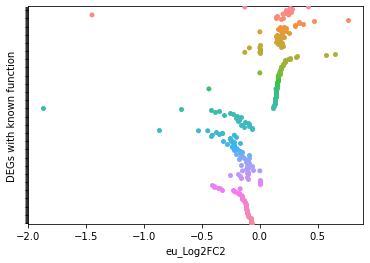

In [97]:

#Eu function

eu = sns.swarmplot(x = "eu_Log2FC2", y= "DEGs with known function", data = eu_df)
eu.set(yticklabels=[])

'''
Similar 


g = sns.catplot(x = "eu_Log2FC2", y= "DEGs with known function", data = eu_df, cmap = "seismic", dodge = True)
g.set(ylabel=None)
g.set(yticklabels=[])


'''

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

66.7% of the points cannot be placed; you

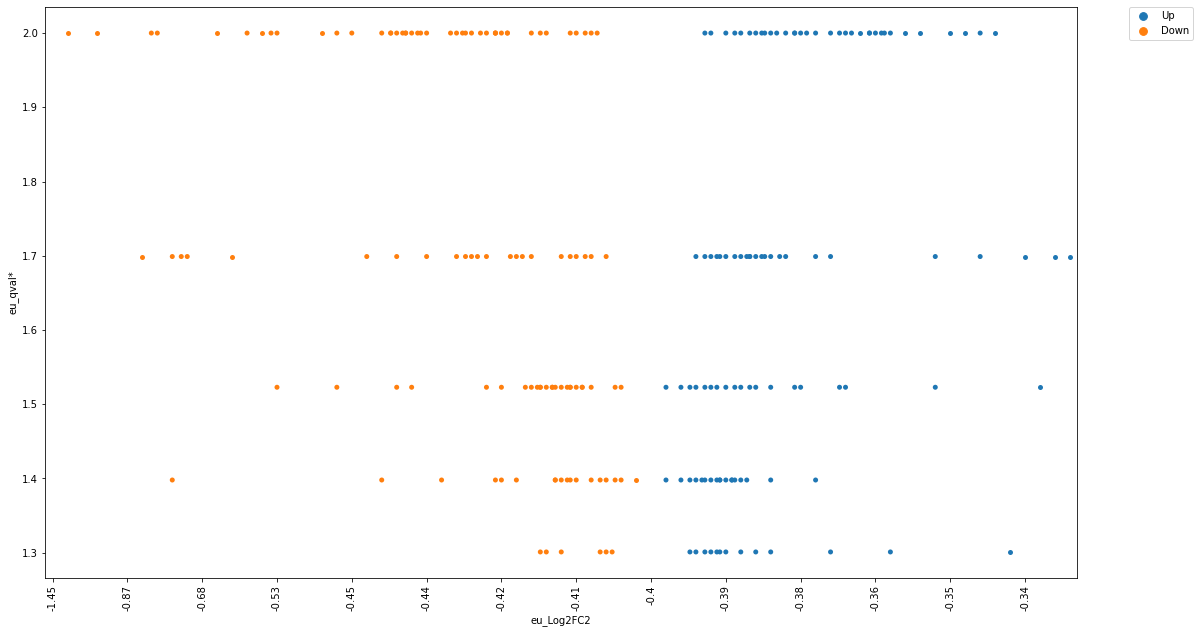

In [104]:

# Eu Using the q value 

eu = sns.swarmplot(x = "eu_Log2FC2", y= "eu_qval*", data = eu_df, hue = "Condition")
eu.xaxis.set_major_locator(ticker.MultipleLocator(5))
eu.set_xticklabels(eu.get_xticklabels(),rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
#fig.savefig('eg_log_qvalue.pdf', dpi=100)

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



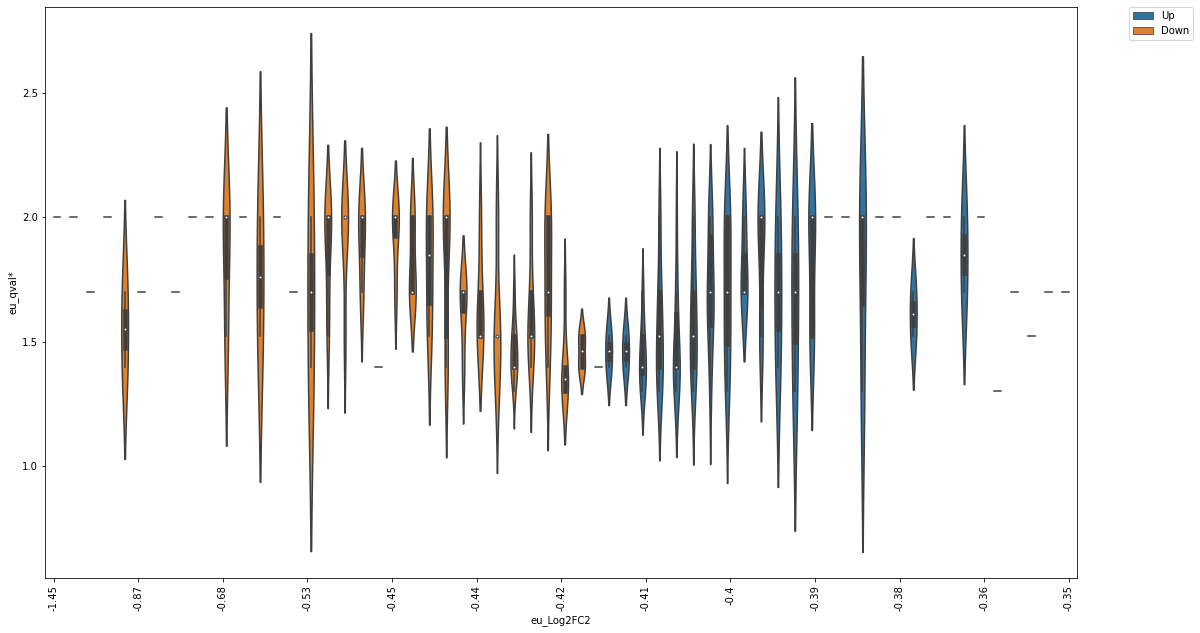

In [216]:
## violin
eu_df_new = eu_df[~eu_df.isin([np.nan, np.inf, -np.inf]).any(1)]
violin_eu = sns.violinplot(x = "eu_Log2FC2", y= "eu_qval*", data = eu_df_new, hue = "Condition")
violin_eu.xaxis.set_major_locator(ticker.MultipleLocator(5))
violin_eu.set_xticklabels(eu.get_xticklabels(),rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('eu_violin.pdf', dpi=100)

## E grandis


/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[[Text(0, 0, ''),
  Text(0, 1, ''),
  Text(0, 2, ''),
  Text(0, 3, ''),
  Text(0, 4, ''),
  Text(0, 5, ''),
  Text(0, 6, ''),
  Text(0, 7, ''),
  Text(0, 8, ''),
  Text(0, 9, ''),
  Text(0, 10, ''),
  Text(0, 11, ''),
  Text(0, 12, ''),
  Text(0, 13, ''),
  Text(0, 14, ''),
  Text(0, 15, ''),
  Text(0, 16, ''),
  Text(0, 17, ''),
  Text(0, 18, ''),
  Text(0, 19, ''),
  Text(0, 20, ''),
  Text(0, 21, ''),
  Text(0, 22, ''),
  Text(0, 23, ''),
  Text(0, 24, ''),
  Text(0, 25, ''),
  Text(0, 26, ''),
  Text(0, 27, ''),
  Text(0, 28, ''),
  Text(0, 29, ''),
  Text(0, 30, ''),
  Text(0, 31, ''),
  Text(0, 32, ''),
  Text(0, 33, ''),
  Text(0, 34, ''),
  Text(0, 35, ''),
  Text(0, 36, ''),
  Text(0, 37, ''),
  Text(0, 38, ''),
  Text(0, 39, ''),
  Text(0, 40, ''),
  Text(0, 41, ''),
  Text(0, 42, ''),
  Text(0, 43, ''),
  Text(0, 44, ''),
  Text(0, 45, ''),
  Text(0, 46, ''),
  Text(0, 47, ''),
  Text(0, 48, ''),
  Text(0, 49, ''),
  Text(0, 50, ''),
  Text(0, 51, ''),
  Text(0, 52, ''),
  T

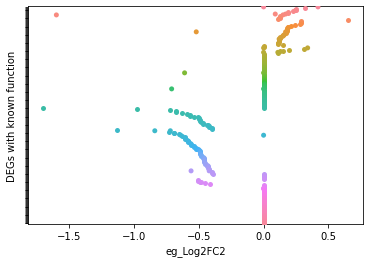

In [12]:
#Eg function

eg = sns.swarmplot(x = "eg_Log2FC2", y= "DEGs with known function", data = eg_df)
eg.set(yticklabels=[])


/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gustavotamasc

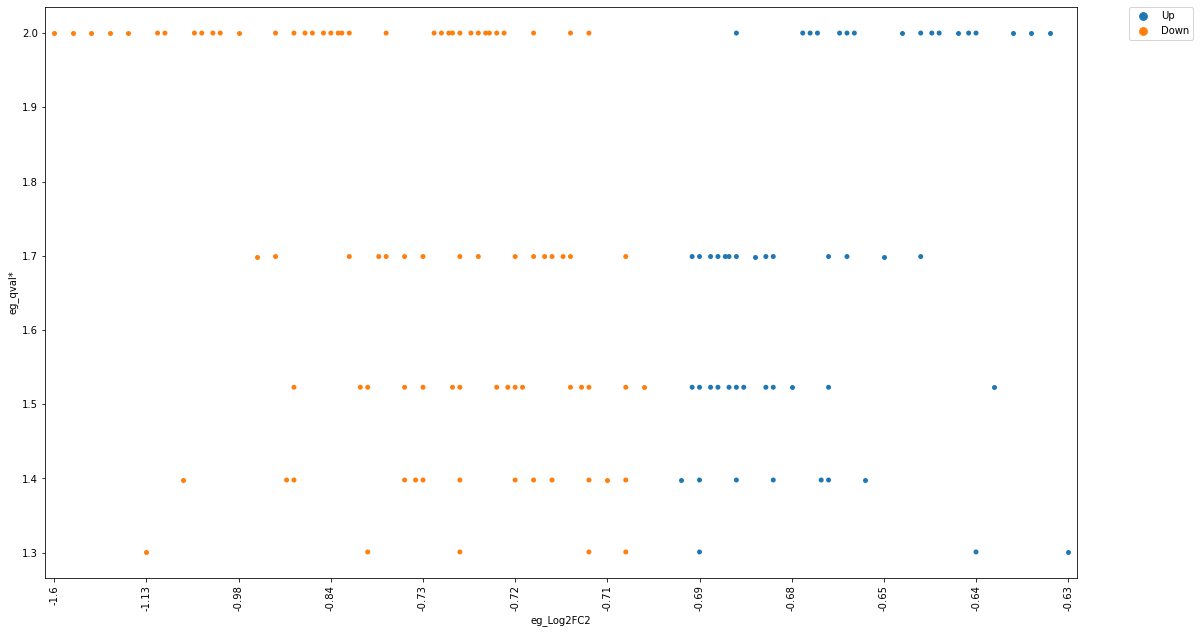

In [23]:
# Eu Using the q value 

eg = sns.swarmplot(x = "eg_Log2FC2", y= "eg_qval*", data = eg_df, hue = "Condition")
eg.xaxis.set_major_locator(ticker.MultipleLocator(5))
eg.set_xticklabels(eg.get_xticklabels(),rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.savefig('eu_log_qvalue.pdf', dpi=100)

/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



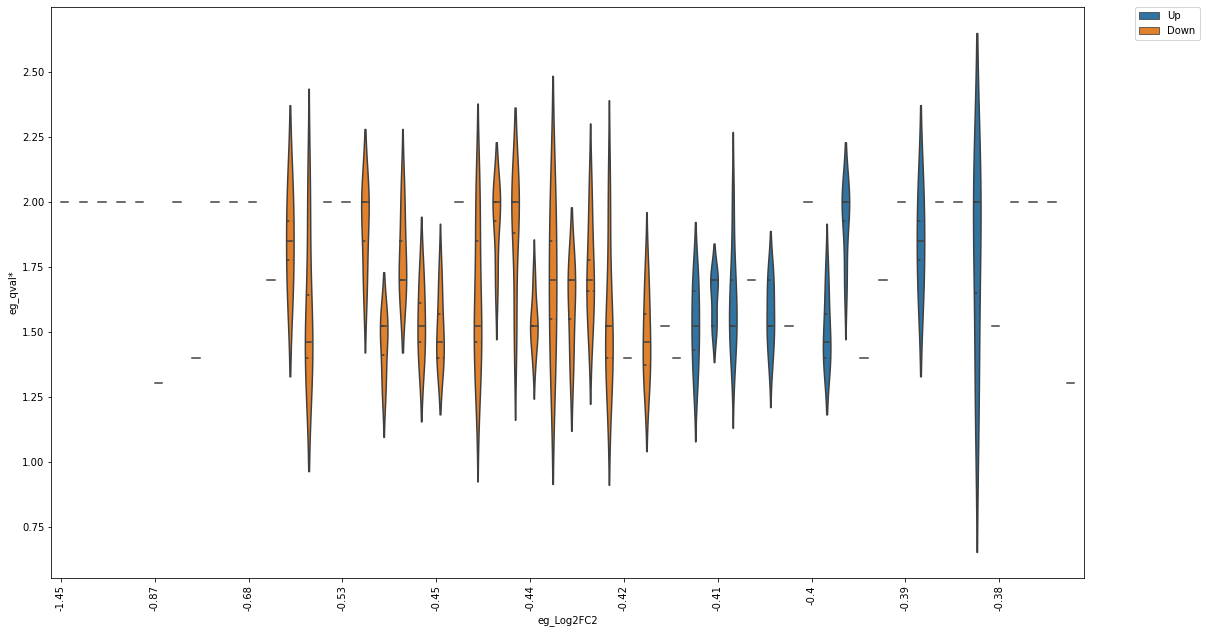

In [217]:
## violin
eg_df_new = eg_df[~eg_df.isin([np.nan, np.inf, -np.inf]).any(1)]
violin_eg = sns.violinplot(x = "eg_Log2FC2", y= "eg_qval*", data = eg_df_new, hue = "Condition", inner="quartile")
violin_eg.xaxis.set_major_locator(ticker.MultipleLocator(5))
violin_eg.set_xticklabels(eu.get_xticklabels(),rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('eg_violin.pdf', dpi=100)

### Violin for both info at the same time


/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



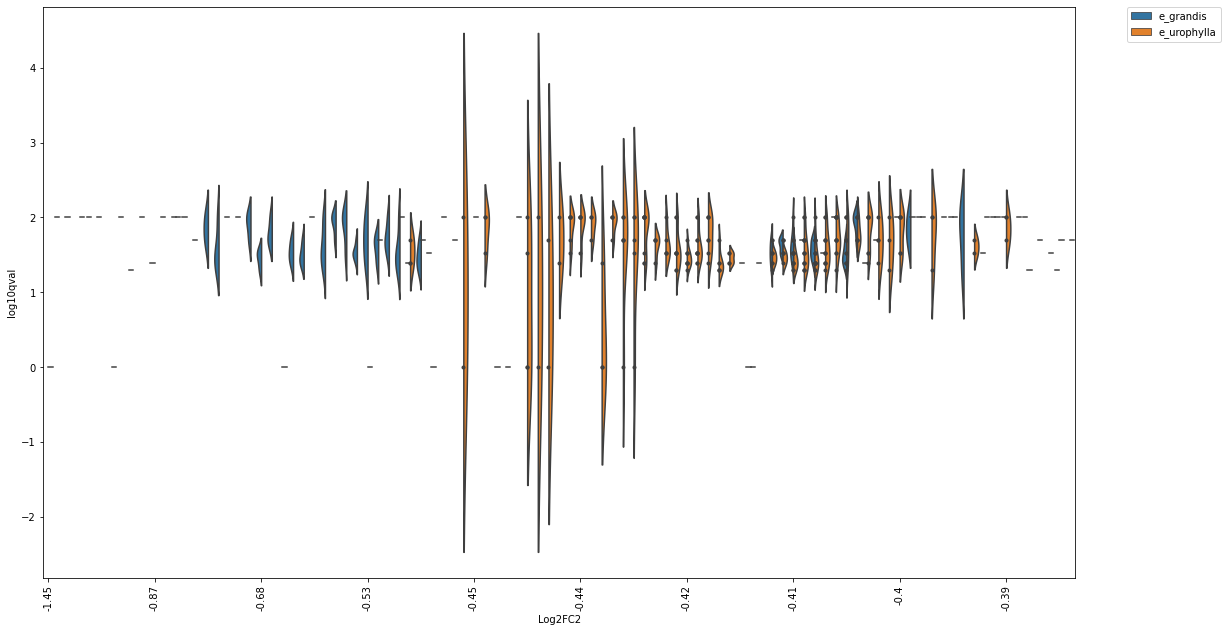

In [218]:
violin_df = pd.read_excel("violin_info.xlsx")

df_new = violin_df[~violin_df.isin([np.nan, np.inf, -np.inf]).any(1)]
df_new

violin = sns.violinplot(x = "Log2FC2", y= "log10qval", data = df_new, hue = "target", inner="point", split=True)
violin.xaxis.set_major_locator(ticker.MultipleLocator(10))
violin.set_xticklabels(eu.get_xticklabels(),rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('combined_violin.pdf', dpi=100)

# Comparison of DEGs sets



## Full comparison with venn



In [220]:

from matplotlib_venn import venn2


In [221]:
set1 = set(eg_up_df["DEGs with known function"])
set2 = set(eu_up_df["DEGs with known function"])

set3 = set(eg_down_df["DEGs with known function"])
set4 = set(eu_down_df["DEGs with known function"])

Up regulated


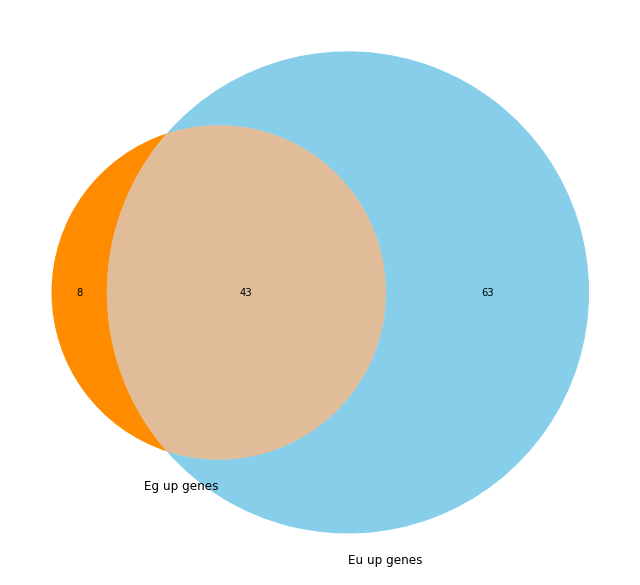

In [223]:
#Up 
print("Up regulated")
c = venn2(subsets= [set1, set2], set_labels = ("Eg up genes","Eu up genes" ))
c.get_patch_by_id('10').set_color('darkorange')
c.get_patch_by_id('01').set_color('skyblue')
c.get_patch_by_id('10').set_edgecolor('none')
c.get_patch_by_id('01').set_edgecolor('none')
c.get_patch_by_id('10').set_alpha(1)
c.get_patch_by_id('01').set_alpha(1)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('venn_up.pdf', dpi=100)



Down regulated


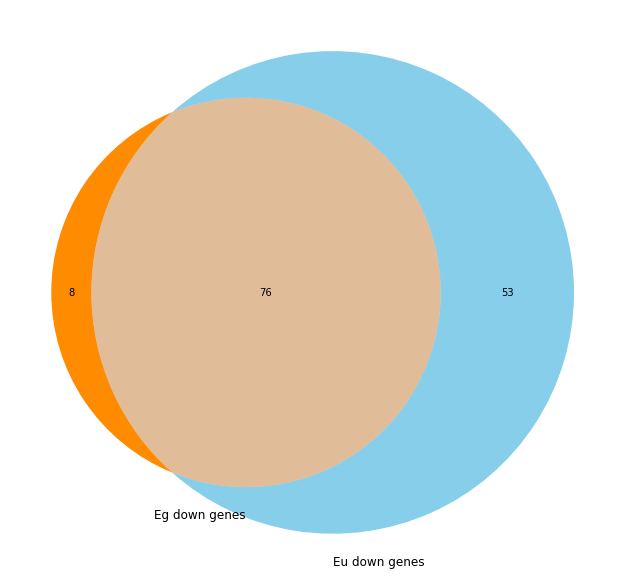

In [224]:
#Down 
print("Down regulated")
c = venn2(subsets= [set3, set4], set_labels = ("Eg down genes","Eu down genes" ))
c.get_patch_by_id('10').set_color('darkorange')
c.get_patch_by_id('01').set_color('skyblue')
c.get_patch_by_id('10').set_edgecolor('none')
c.get_patch_by_id('01').set_edgecolor('none')
c.get_patch_by_id('10').set_alpha(1)
c.get_patch_by_id('01').set_alpha(1)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('venn_down.pdf', dpi=100)

## Cluster map

Here the idea is not to show how the tretments can be organized in groups.

In columns we have the organism profile
In row the genes are clustered based on expression profile

You can use the information of the sets that i provided bellow to check wich genes are more present in each case.

## Heatmap 

Just keep the order in the table, and plot the cound of the FC.

Not so informative for me.

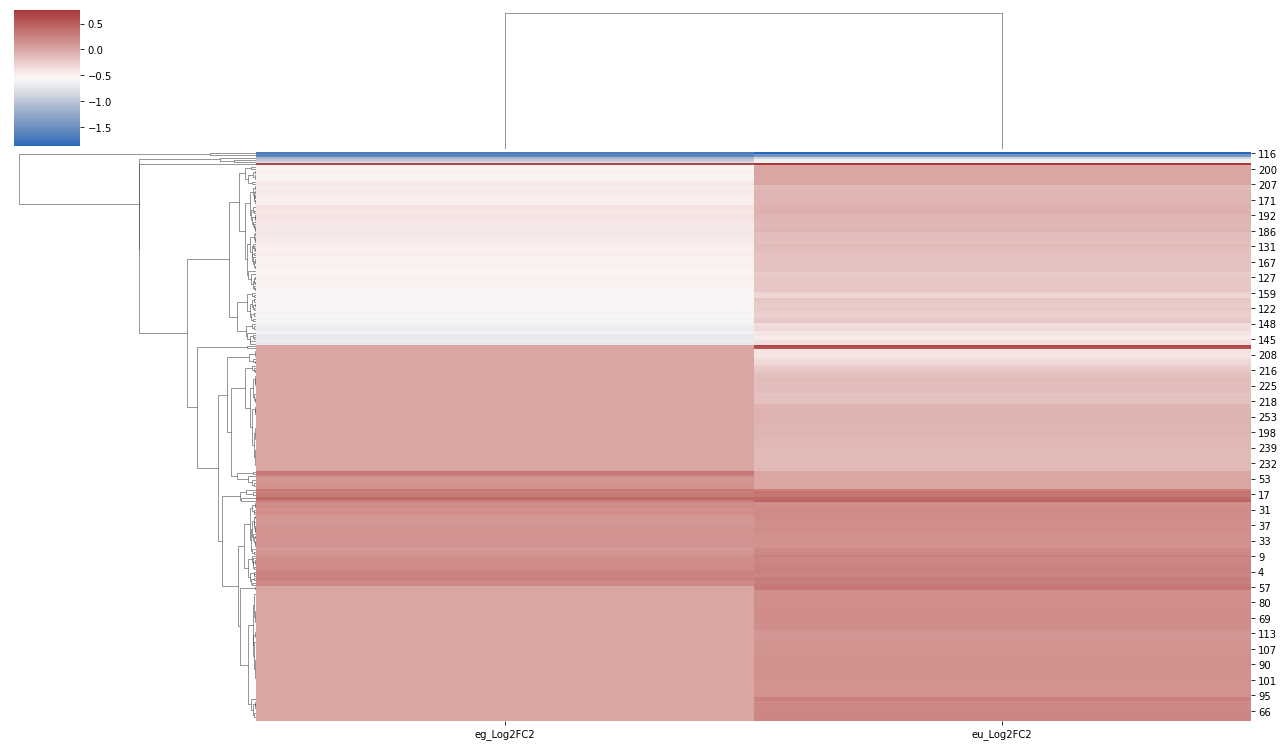

In [225]:
#Clustermap
#degs_df
heat_data = degs_df[["eg_Log2FC2", "eu_Log2FC2"]]
cluster_map = sns.clustermap(heat_data, cmap = "vlag")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

fig.savefig('clustermap.pdf', dpi=100)

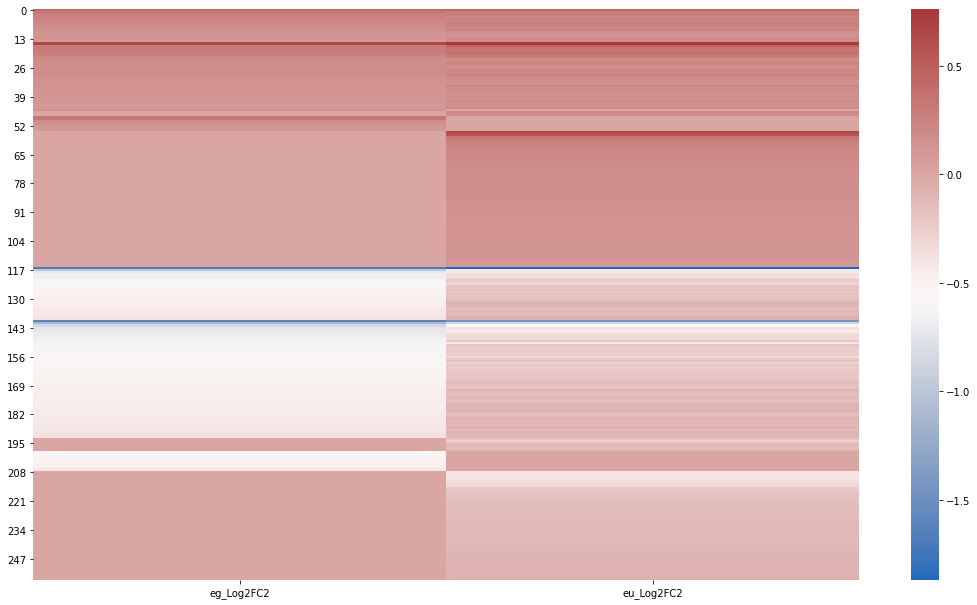

In [226]:
#heat
heat_map = sns.heatmap(heat_data, cmap = "vlag")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.savefig('heatmap.pdf', dpi=100)

## Top 10 hits

In [227]:
#Checking the outliers - top 10 

#For E grandis
top_eg_up_df = eg_up_df.sort_values(by="eg_Log2FC2", ascending =False)[0:10]
highest_hits = top_eg_up_df["DEGs with known function"]
print("The to 10 upregulated gene classes for Eg where \n {}".format(list(highest_hits)))
print("\n-------------------------------------------------------\n")
down_eg_down_df = eg_down_df.sort_values(by = "eg_Log2FC2", ascending=True)[0:10]
lowest_hits = down_eg_down_df["DEGs with known function"]
print("The to 10 downregulated gene classes for Eg where \n {}".format(list(lowest_hits)))


The to 10 upregulated gene classes for Eg where 
 ['Molecular chaperone', 'Zinc metalloprotease', 'Peptidylprolyl isomerase ', 'Zinc finger bed domain-containing protein daysleeper (Quercus suber)', 'Protein of RNA polymerase III Rpc4 family ', 'Glutathione peroxidase', 'Trimethyllysine dioxygenase', 'Family 71 glycosyltransferase', 'Family 4 carbohydrate esterase ', 'Plasma membrane ATPase\xa0 ']

-------------------------------------------------------

The to 10 downregulated gene classes for Eg where 
 ['Thiamine thiazole synthase ', 'Family 26 glycoside hydrolase', 'Catalase', 'D-lactaldehyde dehydrogenase ', 'Glutamate decarboxylase ', 'Malic enzyme', 'Glutamate decarboxylase ', 'Aminotransferase', 'Cytochrome P450 monooxygenase', 'Triosephosphate isomerase']


In [66]:
#For E urophylla

top_eu_up_df = eu_up_df.sort_values(by="eu_Log2FC2", ascending = False)[0:10]
eu_up_genes = top_eu_up_df["DEGs with known function"]
print("The to 10 upregulated gene classes for Eu where \n {}".format(list(eu_up_genes)))
print("\n-------------------------------------------------------\n")
down_eu_down_wf = eu_down_df.sort_values(by="eu_Log2FC2", ascending = True)[0:10]
eu_down_genes = down_eu_down_wf["DEGs with known function"]
print("The to 10 downregulated gene classes for Eu where \n {}".format(list(lowest_hits)))


The to 10 upregulated gene classes for Eu where 
 ['Molecular chaperone', 'Pheromone with four tandem repeats of a putative pheromone peptide ', 'Cutinase ', 'Glutathione peroxidase', 'Zinc metalloprotease', 'Family 4 carbohydrate esterase ', 'Family 71 glycosyltransferase', 'Trimethyllysine dioxygenase', 'NADH dehydrogenase (Ubiquinone) Fe-S protein 7 ', 'TatD family ']

-------------------------------------------------------

The to 10 downregulated gene classes for Eu where 
 ['Thiamine thiazole synthase ', 'Family 26 glycoside hydrolase', 'Catalase', 'D-lactaldehyde dehydrogenase ', 'Glutamate decarboxylase ', 'Malic enzyme', 'Glutamate decarboxylase ', 'Aminotransferase', 'Cytochrome P450 monooxygenase', 'Triosephosphate isomerase']


## Full set comparison 



In [229]:

#Upregulated

set1 = set(eg_up_df["DEGs with known function"])
set2 = set(eu_up_df["DEGs with known function"])
        
up_regulate = set1.intersection(set2)
only_up_eg = set1.difference(set2)
only_up_eu = set2.difference(set1)

print("The following genes were up regulated in both cases\n{}\n -----------------------------\n".format(up_regulate))


print("The gene {} classes were only upregulated in Eg.\n -----------------------------\n And {} were only in Eu".format(only_up_eg, only_up_eu))



The following genes were up regulated in both cases
{'Family 4 carbohydrate esterase ', 'Trimethyllysine dioxygenase', 'Adenosinetriphosphatase', 'Family 26 glycoside hydrolase', 'Family 71 glycosyltransferase', 'Zinc metalloprotease', 'Magnesium-dependent phosphatase-1', 'Family 15 glycoside hydrolase', 'Small nuclear ribonucleo D3', 'X-Pro aminopeptidase', 'Serine/threonine protein kinase', 'Polyubiquitin 11', 'Orotidine 5 -phosphate decarboxylase', 'SPX SLC13_permease', 'Zinc finger bed domain-containing protein daysleeper (Quercus suber)', 'Ribosomal protein L15 ', 'Calcium-transporting ATPase ', 'Plasma membrane ATPase\xa0 ', 'Extracellular metalloproteinase ', 'Serine threonine kinase', 'Serine/threonine protein kinase ', 'Histone H3', 'Vacuolar transporter chaperone 1', 'Ubiquitin conjugating enzyme family', 'AGC NDR kinase', 'Beta-xylanase ', 'Mitochondrial intermediate peptidase mitochondrial precursor', 'Secreted protein', 'Alpha-1,2-Mannosidase ', 'STE/STE7/MKK protein kinas

In [231]:

#Downregulated

set3 = set(eg_down_df["DEGs with known function"])
set4 = set(eu_down_df["DEGs with known function"])
        
down_regulate = set3.intersection(set4)
only_down_eg = set3.difference(set4)
only_down_eu = set4.difference(set3)

print("The following genes were down regulated in both cases\n{}\n -----------------------------\n".format(down_regulate))



print("The gene {} classes were only down regulated in Eg.\n -----------------------------\n And {} were only in Eu".format(only_down_eg, only_down_eu))



The following genes were down regulated in both cases
{'Carbohydrate kinase ', 'Carbohydrate-binding module family 32', 'V-type H+transporting ATPase 21kDa proteolipid subunit', 'Mitochondrial ATP carrier', 'Pyruvate dehydrogenase kinase', 'Malate dehydrogenase ', 'Adenylosuccinate lyase', 'Proteasome subunit alpha type-6', 'Family 26 glycoside hydrolase', 'Adenylosuccinate synthase', 'Beta-hexosaminidase', 'Citrate synthase', 'Thiamine thiazole synthase ', 'Homoserine O-acetyltransferase', 'Catalase', 'Phosphoglycerate mutase', '2,4-dienoyl- reductase (NADPH2)', 'Family 5 glycoside hydrolase ', 'Enoyl- hydratase', 'UPF0061 family protein ', 'Telomerase reverse transcriptase', 'Glutamate decarboxylase ', '1,4-alpha-glucan-branching enzyme', 'Electron transfer flavoprotein alpha subunit', 'Ribose-phosphate pyrophosphokinase', '3-deoxy-7-phosphoheptulonate synthase', 'Transmembrane transport ', 'Family 18 glycoside hydrolase', 'UTP-glucose-1-phosphate uridylyltransferase', 'Mannosyltrans

## PCA analysis to undertand the variability between the wax profiles




In [232]:
from sklearn.preprocessing import StandardScaler


In [233]:
pca_df

,function,FC,logFC,target
0,Zinc metalloprotease,1.34,0.42,E_grandis
1,Zinc finger bed domain-containing protein days...,1.25,0.32,E_grandis
2,Plasma membrane ATPase,1.19,0.25,E_grandis
3,Family 15 glycoside hydrolase,1.19,0.25,E_grandis
4,TATA-box-binding protein,1.18,0.24,E_grandis
...,...,...,...,...
509,Large subunit ribosomal L38e,0.95,-0.08,E_urophylla
510,Serine threonine- kinase fhkC,0.95,-0.08,E_urophylla
511,Ubiquitin-like-specific protease 2,0.95,-0.08,E_urophylla
512,Kinase,0.95,-0.08,E_urophylla


In [234]:
features = ["FC", "logFC"]

#Separating features

x = pca_df.loc[:, features].values

#Separating targets

y = pca_df.loc[:,["target"]].values

#Standarization of features

x = StandardScaler().fit_transform(x)

In [235]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents, columns=["PC 1", "PC 2"])

In [236]:
principalDF

,PC 1,PC 2
0,-2.134668,-0.226216
1,-1.762627,-0.132782
2,-1.506842,-0.062735
3,-1.506842,-0.062735
4,-1.468090,-0.054939
...,...,...
509,-0.367331,0.333824
510,-0.367331,0.333824
511,-0.367331,0.333824
512,-0.367331,0.333824


In [237]:
finalDF = pd.concat([principalDF, pca_df[['target']]], axis =1)

In [238]:
finalDF

,PC 1,PC 2,target
0,-2.134668,-0.226216,E_grandis
1,-1.762627,-0.132782,E_grandis
2,-1.506842,-0.062735,E_grandis
3,-1.506842,-0.062735,E_grandis
4,-1.468090,-0.054939,E_grandis
...,...,...,...
509,-0.367331,0.333824,E_urophylla
510,-0.367331,0.333824,E_urophylla
511,-0.367331,0.333824,E_urophylla
512,-0.367331,0.333824,E_urophylla


In [239]:
finalDF.to_csv("pca_contribution_logfold.csv")

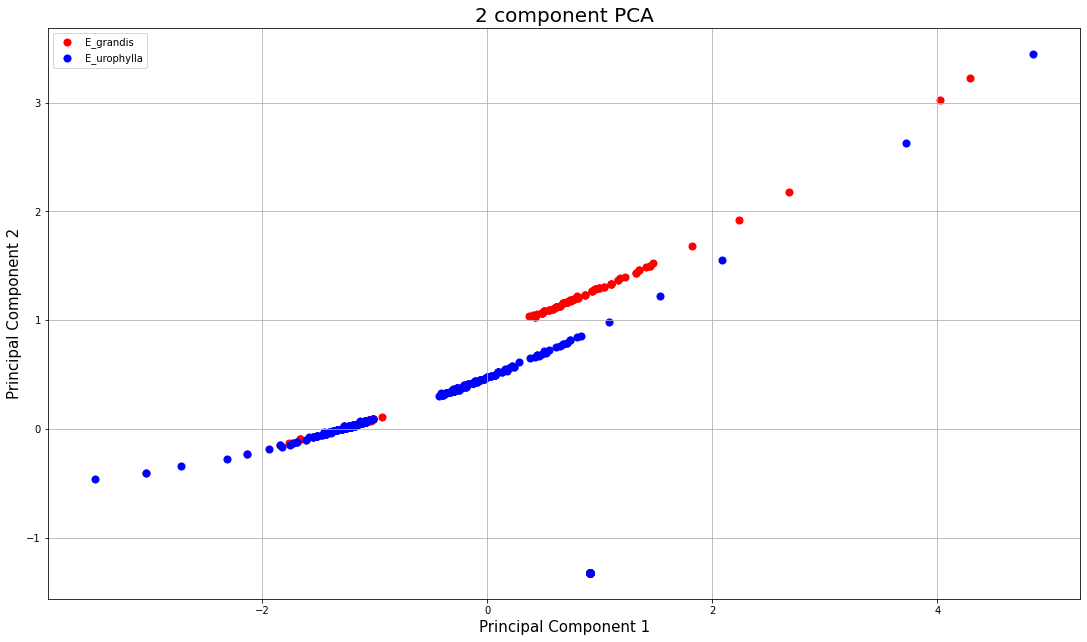

In [240]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['E_grandis', 'E_urophylla']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC 1']
               , finalDF.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('pca_log.pdf', dpi=100)

In [241]:
pca.explained_variance_ratio_

array([0.57003956, 0.42996044])

Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 57% of the variance and the second principal component contains 42% of the variance. Together, the two components contain 99% of the information.

In [170]:
principalDF.to_csv("pca_information.csv", index = False)

In [45]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=2)
components = pca.fit_transform(x)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=pca_df['target'])

for i, feature in enumerate(features):
    if i == 1:
        fig.add_shape(
            type='line',
            x0=0, y0=0,
            x1=loadings[i, 0],
            y1=loadings[i, 1]
        )
        fig.add_annotation(
            x=loadings[i, 0],
            y=loadings[i, 1],
            ax=0, ay=0,
            xanchor="center",
            yanchor="bottom",
            text=feature,
            )
fig.show()

# PCA transposing data


In [242]:
pca_df
cols = pd.array(pca_df["function"])[0:257]
row1 = pd.array(pca_df["logFC"])[0:257]
row2 = pd.array(pca_df["logFC"])[257:]
data = np.array([row1, row2])
#rows = ["E_grandis", "E_urophylla"]

t_pca_df = pd.DataFrame(data)
t_pca_df.columns = list(cols)
#t_pca_df.index = list(rows)

# add target column 

target = ["E_grandis", "E_urophylla"]
t_pca_df["target"] = target



In [243]:
t_pca_df

#t_pca_df.to_csv("pca_t.csv", index = False)

,Zinc metalloprotease,Zinc finger bed domain-containing protein daysleeper (Quercus suber),Plasma membrane ATPase,Family 15 glycoside hydrolase,TATA-box-binding protein,Serine/threonine protein kinase,AGC NDR kinase,Histone H3,Secreted protein,Family 26 glycoside hydrolase,...,Peptidylprolyl isomerase,Adenylate kinase,"Zinc finger, PHD-type protein",Proteasome subunit alpha type,Large subunit ribosomal L38e,Serine threonine- kinase fhkC,Ubiquitin-like-specific protease 2,Kinase,Carotenoid ester lipase precursor,target
0,0.42,0.32,0.25,0.25,0.24,0.23,0.19,0.19,0.17,0.15,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,E_grandis
1,0.42,0.26,0.28,0.23,0.25,0.23,0.27,0.25,0.23,0.25,...,-0.09,-0.09,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.07,E_urophylla


In [244]:
features = list(t_pca_df.columns[0:257])
#Separating features

x2 = t_pca_df.loc[:, features].values

#Separating targets

y2 = t_pca_df.loc[:,["target"]].values

#Standarization of features

x2 = StandardScaler().fit_transform(x2)


In [245]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
principalComponents2 = pca.fit_transform(x2)

principalDF2 = pd.DataFrame(data = principalComponents2, columns=["PC 1", "PC 2"])

In [246]:
principalDF2

,PC 1,PC 2
0,-16.673332,2.014656e-15
1,16.673332,2.014656e-15


In [247]:
finalDF2 = pd.concat([principalDF2, t_pca_df[['target']]], axis =1)

In [248]:
finalDF2

,PC 1,PC 2,target
0,-16.673332,2.014656e-15,E_grandis
1,16.673332,2.014656e-15,E_urophylla


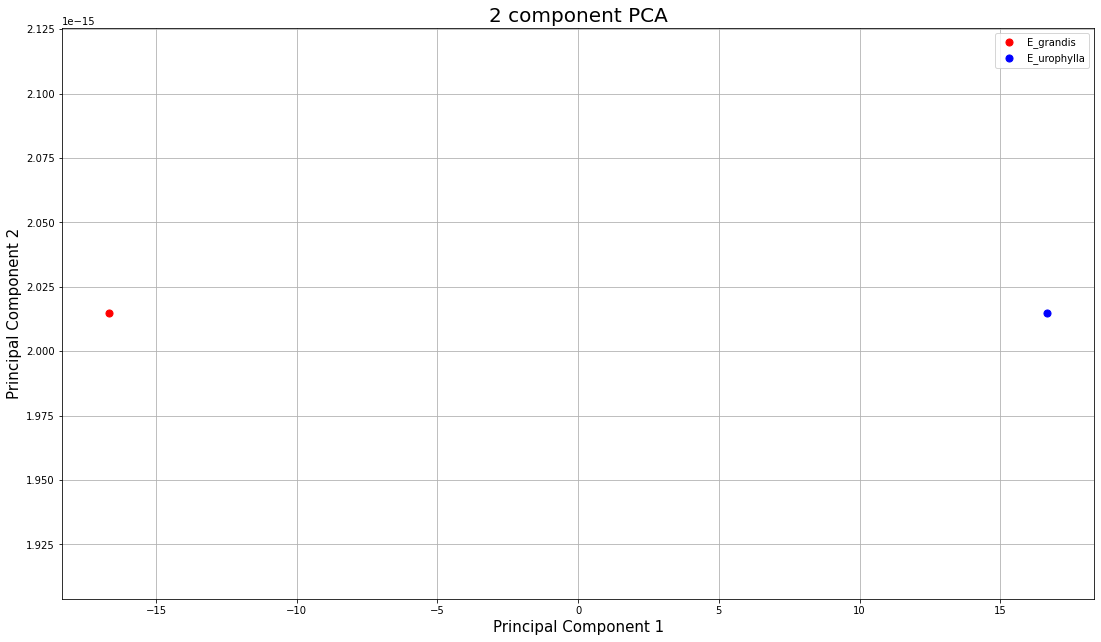

In [249]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['E_grandis', 'E_urophylla']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF2['target'] == target
    ax.scatter(finalDF2.loc[indicesToKeep, 'PC 1']
               , finalDF2.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('pca_go.pdf', dpi=100)

In [25]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.46001382e-32])

### PCA Transposed data results

negative contribute to e_grandis and positive contribute for e_urophylla


In [ ]:
Rotation (n x k) = (253 x 2):
                                                                             PC1          PC2
Zinc.finger.bed.domain.containing.protein.daysleeper..Quercus.suber. -0.06286946  0.856257329
Plasma.membrane.ATPase.                                               0.06286946  0.010392042
Family.15.glycoside.hydrolase                                        -0.06286946  0.111688465
TATA.box.binding.protein                                              0.06286946  0.010392042
AGC.NDR.kinase                                                        0.06286946  0.010392042
Histone.H3                                                            0.06286946  0.010392042
Secreted.protein                                                      0.06286946  0.010392042
Family.26.glycoside.hydrolase                                         0.06286946 -0.027758116
Family.90.glycosyltransferase                                         0.06286946 -0.111688465
Extracellular.metalloproteinase                                       0.06286946  0.010392042
STE.STE7.MKK.protein.kinase                                           0.06286946  0.010392042
Bleomycin.hydrolase                                                   0.06286946  0.010392042
Vacuolar.transporter.chaperone.1                                      0.06286946  0.018022074
Molecular.chaperone                                                   0.06286946 -0.088798370
Glutathione.peroxidase                                                0.06286946 -0.020128085
Family.71.glycosyltransferase                                         0.06286946  0.010392042
Trimethyllysine.dioxygenase                                           0.06286946  0.010392042
Family.4.carbohydrate.esterase                                        0.06286946  0.010392042
Small.nuclear.ribonucleo.D3                                           0.06286946 -0.073538306
Mitochondrial.intermediate.peptidase.mitochondrial.precursor          0.06286946 -0.020128085
Serine.threonine.kinase                                              -0.06286946  0.111688465
Beta.xylanase                                                         0.06286946 -0.111688465
Magnesium.dependent.phosphatase.1                                     0.06286946 -0.043018180
Orotidine.5..phosphate.decarboxylase                                 -0.06286946  0.111688465
Anthranilate.phosphoribosyltransferase                               -0.06286946  0.264289099
Isoleucyl.tRNA.synthetase                                             0.06286946 -0.043018180
Adenosinetriphosphatase                                               0.06286946  0.101952423
Ribosomal.protein.L15                                                 0.06286946 -0.020128085
Polyubiquitin.11                                                      0.06286946  0.101952423
DNA.directed.RNA.polymerase.II.subunit.rpb7                           0.06286946  0.101952423
Pyridoxamine.5..phosphate.oxidase                                     0.06286946  0.033282137
SPX.SLC13_permease                                                    0.06286946  0.010392042
Serine.threonine.protein.kinase.1                                     0.06286946 -0.058278243
Calcium.transporting.ATPase                                           0.06286946 -0.043018180
Serine.threonine.protein.kinase.2                                     0.06286946 -0.073538306
G2.mitotic.specific.cyclin.1.2                                        0.06286946 -0.043018180
X.Pro.aminopeptidase                                                  0.06286946  0.010392042
Alpha.1.2.Mannosidase.                                                0.06286946  0.025652106
Squalene.monooxygenase                                                0.06286946 -0.027758116
Acyl.coenzyme.A.oxidase                                               0.06286946 -0.027758116
Secreted.protein.1                                                    0.06286946 -0.027758116
Ubiquitin.conjugating.enzyme.E2.N                                    -0.06286946 -0.010392042
Golgi.SNAP.receptor.complex.member.1                                  0.06286946  0.010392042
GAF.domain.like.protein                                               0.06286946  0.010392042
Peptidylprolyl.isomerase                                             -0.06286946 -0.010392042
Protein.of.RNA.polymerase.III.Rpc4.family                            -0.06286946 -0.010392042
RNA.binding.domain.protein                                           -0.06286946 -0.010392042
CTP.synthase                                                         -0.06286946 -0.010392042
Sphinganine.1.phosphate.aldolase                                     -0.06286946 -0.010392042
Oligopeptide.transporter                                             -0.06286946 -0.010392042
X60S.ribosomal.L10                                                   -0.06286946 -0.010392042
Pheromone.with.four.tandem.repeats.of.a.putative.pheromone.peptide    0.06286946  0.010392042
Cutinase                                                              0.06286946  0.010392042
NADH.dehydrogenase..Ubiquinone..Fe.S.protein.7                        0.06286946  0.010392042
TatD.family                                                           0.06286946  0.010392042
Prefoldin..alpha.subunit.                                             0.06286946  0.010392042
Splicing.factor.subunit                                               0.06286946  0.010392042
Mitochondrial.inner.membrane.protease.ATP23                           0.06286946  0.010392042
Protein.DOM34.homolog                                                 0.06286946  0.010392042
DNA.directed.RNA.Polymerase.II.subunit.F                              0.06286946  0.010392042
MFS.PHS.inorganic.phosphate.transporter                               0.06286946  0.010392042
Family.20.glycoside.hydrolase                                         0.06286946  0.010392042
Synaptobrevin.like.YKT6                                               0.06286946  0.010392042
Ribosome.biogenesis.protein.RLP24                                     0.06286946  0.010392042
NADH.dehydrogenase..ubiquinone..flavoprotein.1..mitochondrial.        0.06286946  0.010392042
GTP.binding.rhoA                                                      0.06286946  0.010392042
Malate.dehydrogenase                                                  0.06286946  0.010392042
AB.hydrolase.associated.lipase                                        0.06286946  0.010392042
Fe.S.cluster.assembly.DRE2                                            0.06286946  0.010392042
Multi.copper.oxidase.laccase                                          0.06286946  0.010392042
DNA.primase                                                           0.06286946  0.010392042
Ras.like.protein.Rab7                                                 0.06286946  0.010392042
D.3.phosphoglycerate.dehydrogenase                                    0.06286946  0.010392042
NADH.dehydrogenase..quinone..G.subunit                                0.06286946  0.010392042
Nuclear.transcription.factor.beta                                     0.06286946  0.010392042
Tubulin.beta.chain                                                    0.06286946  0.010392042
X3.keto.sterol.reductase                                              0.06286946  0.010392042
Peptidylprolyl.isomerase.1                                            0.06286946  0.010392042
Glutamate.5.semialdehyde.dehydrogenase                                0.06286946  0.010392042
AGC.AKT.kinase                                                        0.06286946  0.010392042
Alanyl.tRNA.synthetase                                                0.06286946  0.010392042
Cysteine.synthase                                                     0.06286946  0.010392042
Translation.initiation.factor.eIF.3.subunit.9                         0.06286946  0.010392042
Cytochrome.c.oxidase.subunit.IV                                       0.06286946  0.010392042
Exosome.complex.component.RRP45                                       0.06286946  0.010392042
DNA.directed.RNA.polymerase.II.subunit.RPB2                           0.06286946  0.010392042
Phospholipid.transporting.ATPase                                      0.06286946  0.010392042
DNA.damage.inducible.1                                                0.06286946  0.010392042
Mitochondrial.dicarboxylate.carrier                                   0.06286946  0.010392042
Family.63.glycoside.hydrolase                                         0.06286946  0.010392042
Cytochrome.P450.monooxygenase                                         0.06286946  0.010392042
Dual.specificity.phosphatase                                          0.06286946  0.010392042
Autophagy.related.protein.18                                          0.06286946  0.010392042
UDP.glucose.4.epimerase                                               0.06286946  0.010392042
GTP.cyclohydrolase.II                                                 0.06286946  0.010392042
Oxoglutarate.dehydrogenase..succinyl.transferring..E1.component       0.06286946  0.010392042
ATP.synthase.gamma.subunit                                            0.06286946  0.010392042
Esterase.lipase                                                       0.06286946  0.010392042
Histone.chaperone.ASF1                                                0.06286946  0.010392042
Transposase.like.protein                                              0.06286946  0.010392042
Aspartyl.tRNA.synthetase                                              0.06286946  0.010392042
Vacuolar.calcium.ion.transporter                                      0.06286946  0.010392042
DNA.replication.licensing.factor.MCM7                                 0.06286946  0.010392042
Peroxisomal.biogenesis.factor.2                                       0.06286946  0.010392042
Chitin.synthase                                                       0.06286946  0.010392042
X14.3.3.family.protein                                                0.06286946  0.010392042
Succinate..CoA.ligase..ADP.forming..subunit.beta..mitochondrial.      0.06286946  0.010392042
Cystathionine.beta.lyase                                              0.06286946  0.010392042
V.type.proton.ATPase.subunit.a                                        0.06286946  0.010392042
Family.31.glycoside.hydrolase                                         0.06286946  0.010392042
Acyl..dehydrogenase                                                   0.06286946  0.010392042
Carboxypeptidase                                                      0.06286946  0.010392042
Thiamine.thiazole.synthase                                           -0.06286946  0.104058433
D.lactaldehyde.dehydrogenase                                          0.06286946  0.048542201
Aminotransferase                                                      0.06286946 -0.020128085
Proline.iminopeptidase                                                0.06286946  0.010392042
Glyceraldehyde.3.phosphate.dehydrogenase                              0.06286946  0.010392042
Phosphoglucomutase                                                    0.06286946  0.010392042
Nucleoside.diphosphate.kinase                                         0.06286946  0.002762011
Pyruvate.dehydrogenase.kinase                                         0.06286946 -0.020128085
Transmembrane.transport                                               0.06286946  0.018022074
Carbohydrate.kinase                                                   0.06286946 -0.012498053
Large.subunit.ribosomal.L6e                                           0.06286946  0.018022074
Mannosyltransferase                                                   0.06286946 -0.004868021
Terpene.cyclase.mutase.family.member                                  0.06286946 -0.020128085
Transaldolase                                                         0.06286946 -0.020128085
Family.5.glycoside.hydrolase                                          0.06286946 -0.020128085
Asparagine.synthetase                                                 0.06286946  0.010392042
Phosphoribosylamine.glycine.ligase                                    0.06286946  0.002762011
MC.family.mitochondrial.carrier                                       0.06286946  0.002762011
Homoserine.O.acetyltransferase                                        0.06286946 -0.004868021
Family.4.carbohydrate.esterase.1                                      0.06286946  0.002762011
Superoxide.dismutase                                                  0.06286946  0.018022074
Family.59.glycosyltransferase                                         0.06286946  0.018022074
Palmitoyl..thioesterase.precursor                                     0.06286946  0.010392042
Glutamate.5.kinase                                                    0.06286946  0.010392042
Family.26.glycoside.hydrolase.1                                       0.06286946 -0.134578560
Catalase                                                              0.06286946  0.040912169
Glutamate.decarboxylase                                               0.06286946  0.033282137
Malic.enzyme                                                          0.06286946 -0.020128085
Glutamate.decarboxylase.1                                             0.06286946 -0.012498053
Cytochrome.P450.monooxygenase.1                                       0.06286946 -0.012498053
Triosephosphate.isomerase                                             0.06286946  0.025652106
Carbohydrate.binding.module.family.12                                 0.06286946  0.025652106
Malate.synthase.A                                                     0.06286946  0.010392042
Family.18.glycoside.hydrolase                                         0.06286946  0.002762011
Endoglucanase.V                                                       0.06286946  0.048542201
Mitochondrial.ATP.carrier                                             0.06286946  0.002762011
Glutamine.dependent.NAD...synthetase                                  0.06286946  0.010392042
Fumarate.mitochondrial                                                0.06286946  0.010392042
X2.4.dienoyl..reductase..NADPH2.                                      0.06286946  0.010392042
Acyl..oxidase                                                         0.06286946  0.010392042
UTP.glucose.1.phosphate.uridylyltransferase                           0.06286946 -0.020128085
Aldehyde.dehydrogenase.7.family..member.A1                            0.06286946  0.002762011
X3.hydroxybutyryl..dehydrogenase                                      0.06286946  0.018022074
Telomerase.reverse.transcriptase                                      0.06286946  0.010392042
Saccharopine.dehydrogenase.domain.containing                          0.06286946  0.002762011
Citrate.synthase                                                      0.06286946  0.010392042
Diazepam.binding.inhibitor..GABA.receptor.acyl...binding..            0.06286946  0.010392042
Enolase                                                               0.06286946  0.002762011
Enoyl..hydratase                                                      0.06286946 -0.012498053
Lactoylglutathione.lyase                                              0.06286946 -0.004868021
Malate.dehydrogenase.1                                                0.06286946  0.002762011
Adenylosuccinate.synthase                                             0.06286946  0.018022074
X1.4.alpha.glucan.branching.enzyme                                    0.06286946  0.018022074
Carbohydrate.binding.module.family.32                                 0.06286946  0.018022074
Amylo.1.6.glucosidase                                                 0.06286946  0.002762011
Related.to.Ribonuclease.P.subunit.p30                                 0.06286946 -0.004868021
UPF0061.family.protein                                                0.06286946  0.018022074
Electron.transfer.flavoprotein.alpha.subunit                          0.06286946  0.018022074
Tryptophan.synthase                                                   0.06286946  0.002762011
Cyclopropane.fatty.acyl.phospholipid.synthase                         0.06286946  0.025652106
V.type.H.transporting.ATPase.21kDa.proteolipid.subunit                0.06286946  0.010392042
Secreted.protein..Melampsora.larici.populina....                      0.06286946  0.018022074
Adenylosuccinate.lyase                                                0.06286946  0.018022074
X26S.proteasome.regulatory.subunit.N12                                0.06286946  0.025652106
Acetyl..acyltransferase                                               0.06286946  0.018022074
Phosphoglycerate.mutase                                               0.06286946  0.018022074
X3.deoxy.7.phosphoheptulonate.synthase                                0.06286946  0.002762011
Isocitrate.lyase                                                      0.06286946  0.025652106
Omega.6.fatty.acid.desaturase..delta.12.desaturase.                   0.06286946  0.010392042
Glutamate.dehydrogenase                                               0.06286946  0.025652106
X20S.proteasome.subunit.beta.5                                        0.06286946  0.018022074
Ribose.phosphate.pyrophosphokinase                                    0.06286946  0.025652106
Aconitate.mitochondrial                                               0.06286946  0.010392042
Beta.hexosaminidase                                                   0.06286946  0.002762011
Proteasome.subunit.alpha.type.6                                       0.06286946  0.002762011
Nascent.polypeptide.associated.complex.subunit                        0.06286946  0.010392042
X60S.ribosomal.protein.L12                                            0.06286946 -0.004868021
Ubiquitin.5                                                          -0.06286946 -0.010392042
X60S.acidic.ribosomal.P1                                             -0.06286946 -0.010392042
Family.22.glycosyltransferase                                        -0.06286946 -0.010392042
Methylthioribose.1.phosphate.isomerase                               -0.06286946 -0.010392042
Cell.wall.integrity.scw1                                             -0.06286946 -0.010392042
Methylsterol.monooxygenase                                           -0.06286946 -0.010392042
D.3.phosphoglycerate.dehydrogenase.1                                  0.06286946  0.010392042
Beta.hexosaminidase.1                                                 0.06286946  0.010392042
Adenosinetriphosphatase.1                                             0.06286946  0.010392042
Geranylgeranyl.diphosphate.type.III                                   0.06286946  0.010392042
Exosome.complex.component.RRP4                                        0.06286946  0.010392042
Succinyl..synthetase.alpha.subunit                                    0.06286946  0.010392042
X3.hydroxyisobutyrate.dehydrogenase                                   0.06286946  0.010392042
GDP.L.fucose.synthase                                                 0.06286946  0.010392042
Glycoside.hydrolase.family.92                                         0.06286946  0.010392042
Reverse.transcriptase.domain.protein                                 -0.06286946 -0.010392042
Family.18.glycoside.hydrolase.1                                      -0.06286946 -0.010392042
Thiamine.pyrophosphokinase                                           -0.06286946 -0.010392042
Family.23.glycoside.hydrolase                                        -0.06286946 -0.010392042
Glutamate.cysteine.ligase.catalytic.subunit                          -0.06286946 -0.010392042
X60S.acidic.ribosomal.protein.P0                                     -0.06286946 -0.010392042
Glycogen.synthase                                                    -0.06286946 -0.010392042
Tryptophanyl.tRNA.synthetase                                         -0.06286946 -0.010392042
Mannosyltransferase.1                                                -0.06286946 -0.010392042
X26S.proteasome.regulatory.subunit.N6                                -0.06286946 -0.010392042
Phosphoglycerate.kinase                                              -0.06286946 -0.010392042
Peroxisomal.coenzyme.A.synthetase                                    -0.06286946 -0.010392042
X60S.acidic.ribosomal.protein.P0.1                                   -0.06286946 -0.010392042
Fructose.1.6..cytosolic                                              -0.06286946 -0.010392042
X3.hydroxyanthranilate.3.4.dioxygenase.2                             -0.06286946 -0.010392042
Zinc.finger.345.like                                                 -0.06286946 -0.010392042
Acyl.CoA.desaturase                                                  -0.06286946 -0.010392042
Small.subunit.ribosomal.S10e                                         -0.06286946 -0.010392042
X40S.ribosomal.S0                                                    -0.06286946 -0.010392042
Propionyl..carboxylase.beta.chain                                    -0.06286946 -0.010392042
Protein.phosphatase.methylesterase.1                                 -0.06286946 -0.010392042
Zinc.metalloprotease.1                                               -0.06286946 -0.010392042
Histone.H2B                                                          -0.06286946 -0.010392042
Oligopeptide.transporter.1                                           -0.06286946 -0.010392042
Actin.like.2.3.subunit.3                                             -0.06286946 -0.010392042
Phosphoglycerate.mutase.1                                            -0.06286946 -0.010392042
Aspartic.peptidase.A1                                                -0.06286946 -0.010392042
MFS.SHS.lactate.transporter                                          -0.06286946 -0.010392042
L.aminoadipate.semialdehyde.dehydrogenase                            -0.06286946 -0.010392042
Family.16.glycoside.hydrolase                                        -0.06286946 -0.010392042
DNA.directed.RNA.polymerase.II.subunit.A                             -0.06286946 -0.010392042
CMGC.MAPK.kinase                                                     -0.06286946 -0.010392042
Glycerol.kinase                                                      -0.06286946 -0.010392042
Homeodomain.like.containing                                          -0.06286946 -0.010392042
CAMK.CAMKL.kinase                                                    -0.06286946 -0.010392042
CAMK.CAMK1.CAMK1.RCK.kinase                                          -0.06286946 -0.010392042
Pyruvate.kinase                                                      -0.06286946 -0.010392042
Galactan.1.3.beta.galactosidase                                      -0.06286946 -0.010392042
Mitochondrial.ABC.transporter.ATM                                    -0.06286946 -0.010392042
Glucose.6.phosphate.isomerase                                        -0.06286946 -0.010392042
Peptidylprolyl.isomerase.2                                           -0.06286946 -0.010392042
Adenylate.kinase                                                     -0.06286946 -0.010392042
Zinc.finger..PHD.type.protein.                                       -0.06286946 -0.010392042
Proteasome.subunit.alpha.type                                        -0.06286946 -0.010392042
Large.subunit.ribosomal.L38e                                         -0.06286946 -0.010392042
Serine.threonine..kinase.fhkC                                        -0.06286946 -0.010392042
Ubiquitin.like.specific.protease.2                                   -0.06286946 -0.010392042
Kinase                                                               -0.06286946 -0.010392042
Carotenoid.ester.lipase.precursor                                    -0.06286946 -0.010392042

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [283] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


/Users/gustavotamasco/opt/anaconda3/lib/python3.7/site-packages/pca/pca.py:943: RuntimeWarning: divide by zero encountered in true_divide
  rad_cc = (xct**2 / (width / 2.)**2) + (yct**2 / (height / 2.)**2)


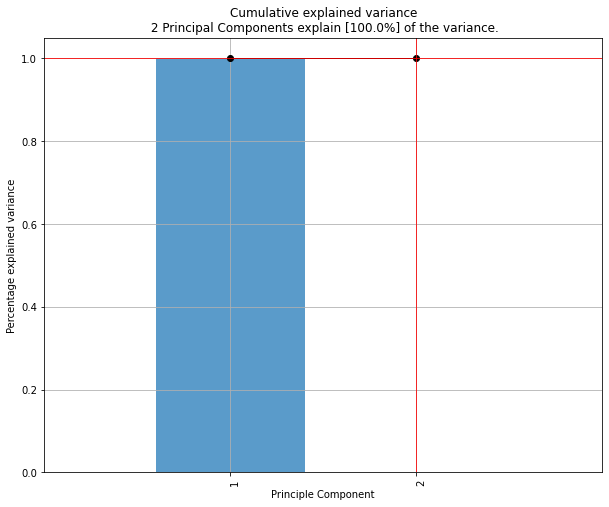

<Figure size 432x288 with 0 Axes>

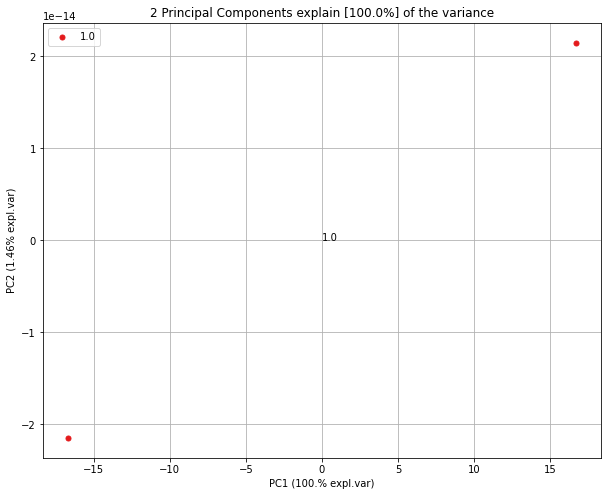

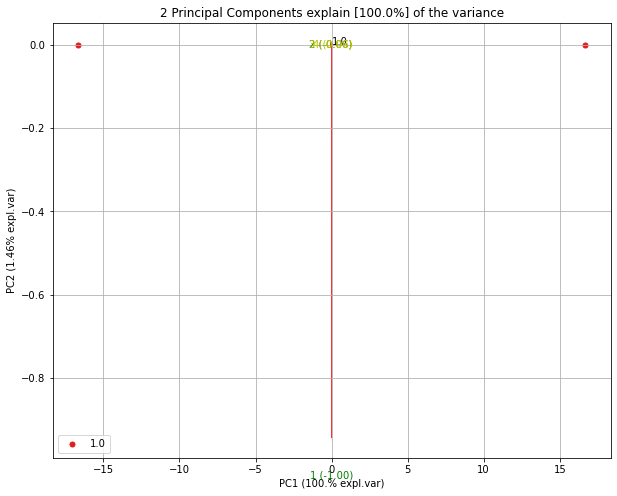

In [28]:
###Fail + - 
from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
#model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(x2)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)

In [42]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=2)
components = pca.fit_transform(x2)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=t_pca_df['target'])

for i, feature in enumerate(features):
    if i == 1:
        fig.add_shape(
            type='line',
            x0=0, y0=0,
            x1=loadings[i, 0],
            y1=loadings[i, 1]
        )
        fig.add_annotation(
            x=loadings[i, 0],
            y=loadings[i, 1],
            ax=0, ay=0,
            xanchor="center",
            yanchor="bottom",
            text=feature,
            )
fig.show()

# Evaluating the go terms

#Forget it 

go_df = go_df[["GO Terms", "eg_N", "eu_N"]]

#go_df = go_df[~go_df.isin([np.nan, np.inf, -np.inf]).any(1)]

go_df = go_df.replace({'-': 0})

go = pd.read_excel("go.xlsx")

go = go.replace({"-":0})
go

In [207]:
#Fixing the data : remove - and nan values

go_df = go_df.replace({'-': 0})
go_df = go_df[~go_df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [208]:
#separating info
e_grandis_go_info = go_df[["GO Terms", "e_grandis", "condition"]]
e_uro_go_info = go_df[["GO Terms", "e_urophylla", "condition"]]

In [209]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [210]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

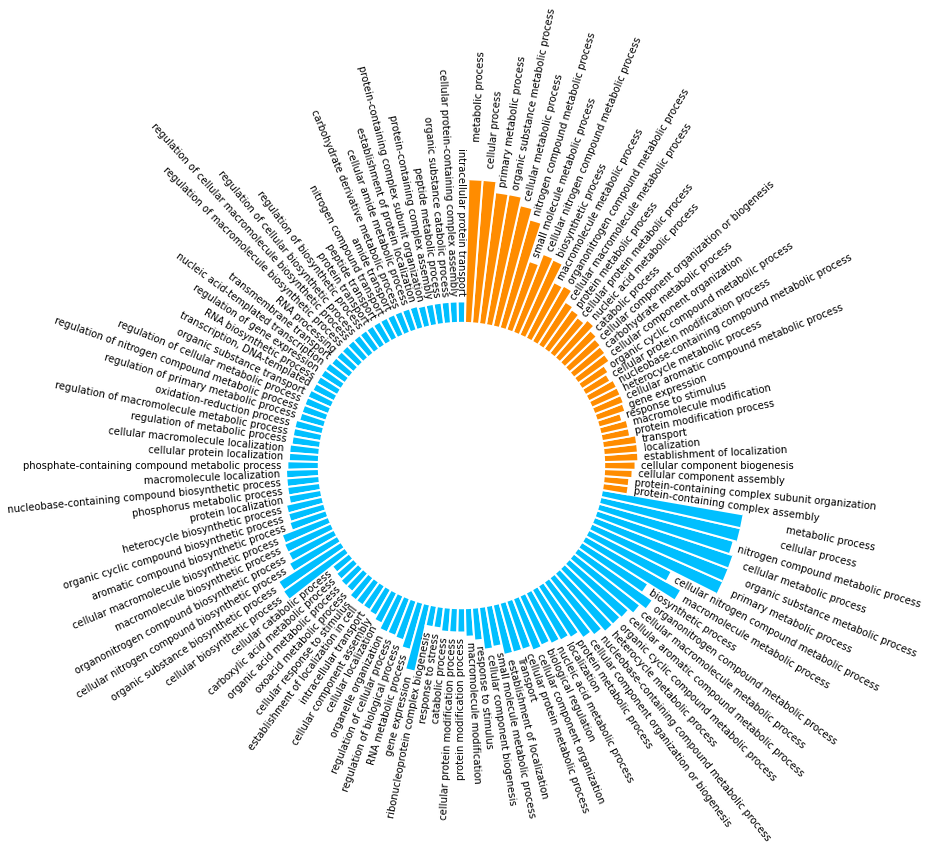

In [250]:
# Circular plot for e_uro

e_uro_go_info = e_uro_go_info[e_uro_go_info["e_urophylla"]>1]

# Grab the group values
GROUP = e_uro_go_info["condition"].values
ANGLES = np.linspace(0, 2 * np.pi, len(e_uro_go_info), endpoint=False)
VALUES = e_uro_go_info["e_urophylla"].values
LABELS = e_uro_go_info["GO Terms"].values


# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color=e_uro_go_info["condition"], edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('urophylla_go.pdf', dpi=100)


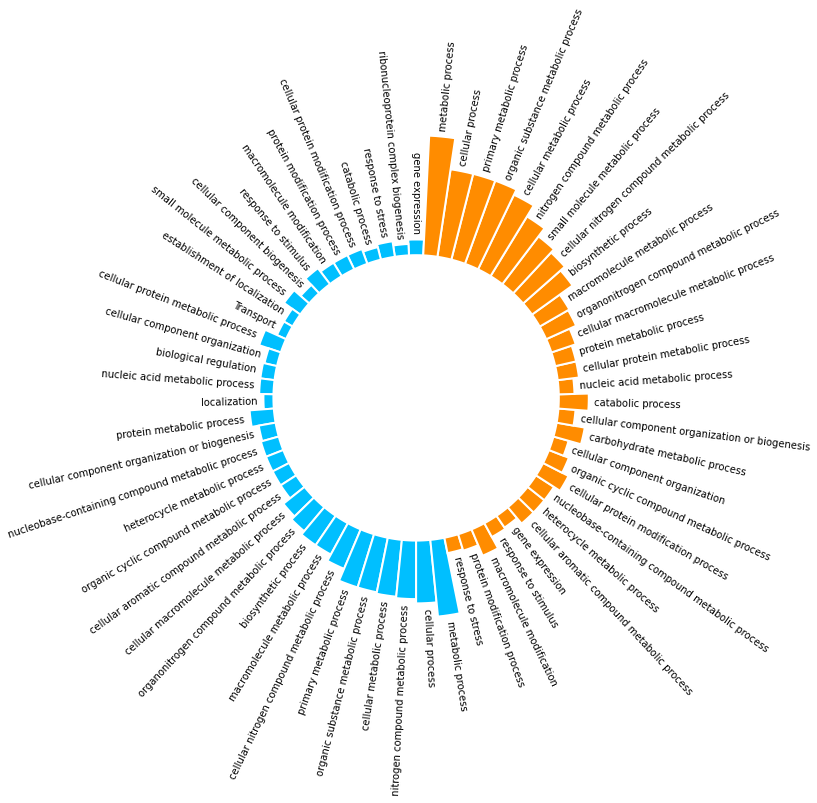

In [251]:
# Circular plot for e_grandis

e_grandis_go_info = e_grandis_go_info[e_grandis_go_info["e_grandis"]>1]

# Grab the group values
GROUP = e_grandis_go_info["condition"].values
ANGLES = np.linspace(0, 2 * np.pi, len(e_grandis_go_info), endpoint=False)
VALUES = e_grandis_go_info["e_grandis"].values
LABELS = e_grandis_go_info["GO Terms"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color=e_grandis_go_info["condition"], edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('grandis_go.pdf', dpi=100)

# BUBBLE map


In [214]:
e_grandis_go_info

,GO Terms,e_grandis,condition
59,gene expression,11,deepskyblue
60,ribonucleoprotein complex biogenesis,8,deepskyblue
61,response to stress,11,deepskyblue
62,catabolic process,9,deepskyblue
63,cellular protein modification process,11,deepskyblue
...,...,...,...
124,cellular metabolic process,58,darkorange
125,organic substance metabolic process,62,darkorange
126,primary metabolic process,62,darkorange
127,cellular process,62,darkorange
